## 簡單線性迴歸

In [ ]:
import pandas
salary = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/salary.csv', index_col = 0)

Populating the interactive namespace from numpy and matplotlib


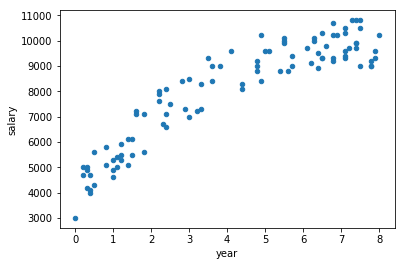

In [5]:
%pylab inline
salary.plot(kind='scatter', x = 'year', y= 'salary')

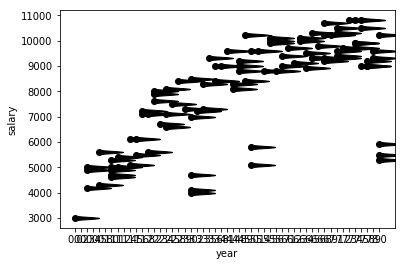

In [8]:
from matplotlib import pyplot as plt
X = salary[['year']]
Y = salary['salary']

plt.scatter(X,Y,color='black')
plt.xlabel('year')
plt.ylabel('salary')
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
regr.coef_

array([712.59413615])

In [11]:
regr.intercept_

5049.009899813836

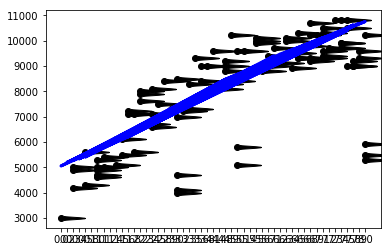

In [22]:

plt.scatter(X,Y,color='black' )
Y_ = regr.predict(X)
plt.plot(X,Y_,color='blue',linewidth=3)
plt.show()